In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiments/results/experimento-f3_experiment_20241207_233212/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,fine_tuning,fine_tuning,tensor(0.2315),tensor(0.0696),1.199178,tensor(0.6765),tensor(0.8063),0.416886
1,0.01,fine_tuning,fine_tuning,tensor(0.1458),tensor(0.0448),0.708092,tensor(0.7662),tensor(0.9182),0.514407
2,0.01,fine_tuning,fine_tuning,tensor(0.1941),tensor(0.1165),0.742520,tensor(0.6371),tensor(0.7035),0.431136
3,0.01,fine_tuning,fine_tuning,tensor(0.1605),tensor(0.0499),0.927636,tensor(0.7296),tensor(0.8919),0.522060
4,0.01,fine_tuning,fine_tuning,tensor(0.1919),tensor(0.0265),1.034382,tensor(0.7393),tensor(0.9543),0.504099


In [3]:
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce') * 100
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,1.0,fine_tuning,fine_tuning,0.2315,0.0696,1.199178,0.6765,0.8063,0.416886
1,1.0,fine_tuning,fine_tuning,0.1458,0.0448,0.708092,0.7662,0.9182,0.514407
2,1.0,fine_tuning,fine_tuning,0.1941,0.1165,0.742520,0.6371,0.7035,0.431136
3,1.0,fine_tuning,fine_tuning,0.1605,0.0499,0.927636,0.7296,0.8919,0.522060
4,1.0,fine_tuning,fine_tuning,0.1919,0.0265,1.034382,0.7393,0.9543,0.504099


In [5]:
# Agrupamento com média e desvio padrão
grouped = df.groupby(['ratio', 'image_encoder_method', 'mask_decoder_method'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando o DataFrame após o agrupamento
grouped.columns = ['ratio', 'image_encoder_method', 'mask_decoder_method',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std',]

# Criando uma coluna que combina 'image_encoder_method' e 'mask_decoder_method'
grouped['method_combination'] = grouped['image_encoder_method'] + ' & ' + grouped['mask_decoder_method']

In [6]:
grouped

,ratio,image_encoder_method,mask_decoder_method,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std,method_combination
0,1.0,adapter,adapter,1.63040,0.438799,1.63568,0.456027,1.738082,0.417223,0.10932,0.049320,0.10866,0.048813,0.101171,0.045912,adapter & adapter
1,1.0,adapter,fine_tuning,0.24936,0.079660,0.37076,0.048036,0.932371,0.177980,0.57756,0.058828,0.51556,0.037598,0.347840,0.063358,adapter & fine_tuning
2,1.0,adapter,freeze,2.43800,1.156497,2.42186,1.140638,2.559636,1.245726,0.06292,0.041832,0.06274,0.042029,0.049624,0.027000,adapter & freeze
3,1.0,fine_tuning,adapter,0.12732,0.040238,0.21468,0.028493,0.767795,0.247156,0.69638,0.061776,0.63006,0.015730,0.457504,0.029861,fine_tuning & adapter
4,1.0,fine_tuning,fine_tuning,0.06146,0.034384,0.18476,0.033276,0.922362,0.204608,0.85484,0.100673,0.70974,0.052051,0.477718,0.049696,fine_tuning & fine_tuning
5,1.0,fine_tuning,freeze,0.13548,0.020697,0.23082,0.017391,0.898925,0.180796,0.69504,0.082609,0.62342,0.029624,0.458070,0.050694,fine_tuning & freeze
6,1.0,freeze,adapter,10.17292,5.985170,10.11972,6.075899,9.914349,5.771058,0.03816,0.021506,0.03958,0.020279,0.040176,0.015679,freeze & adapter
7,1.0,freeze,fine_tuning,0.13620,0.020752,0.23682,0.023415,0.937572,0.191631,0.66474,0.060014,0.57328,0.020023,0.385579,0.028446,freeze & fine_tuning
8,100.0,adapter,adapter,0.11688,0.024940,0.12004,0.025497,0.628281,0.102132,0.73464,0.046103,0.71926,0.047043,0.500551,0.034380,adapter & adapter
9,100.0,adapter,fine_tuning,0.02816,0.001076,0.03066,0.000953,1.851875,0.162609,0.94660,0.002047,0.94086,0.002721,0.511830,0.020088,adapter & fine_tuning


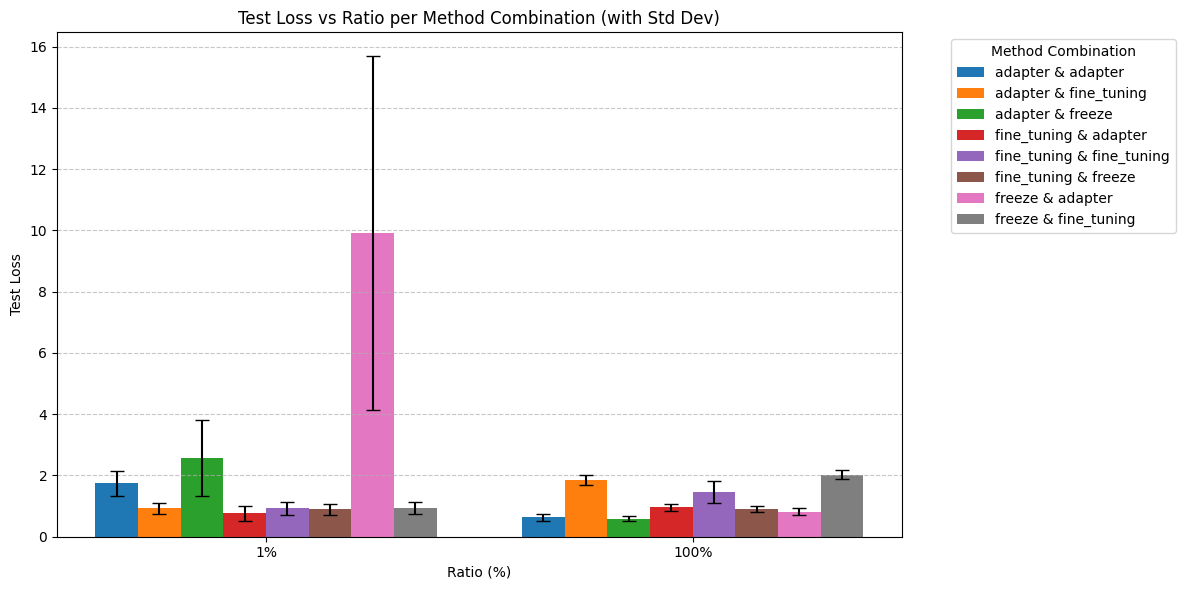

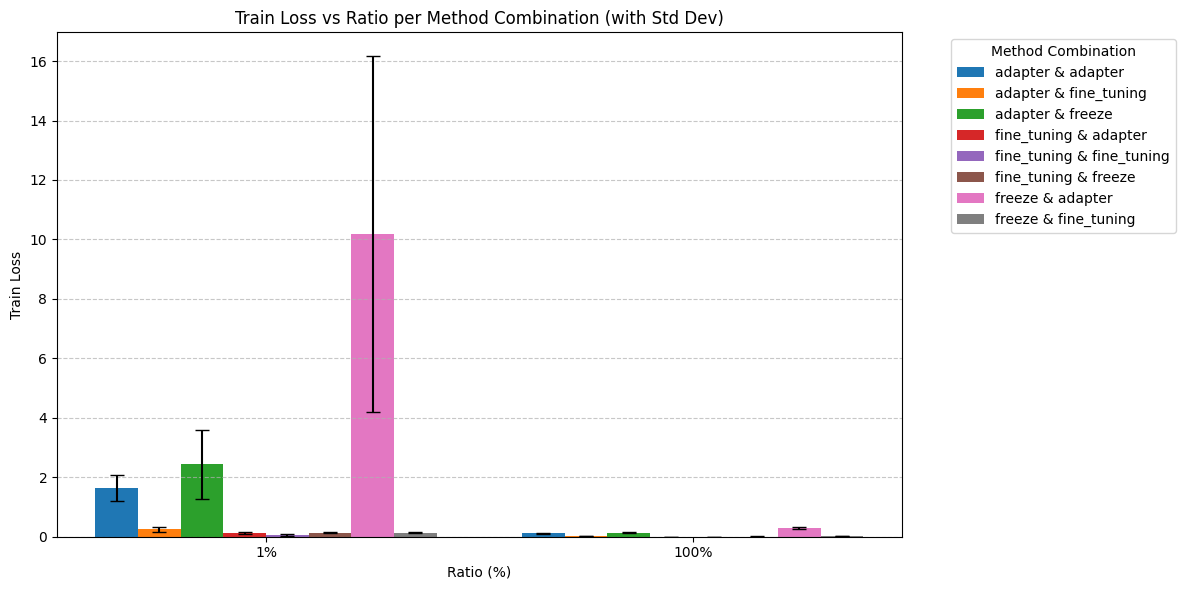

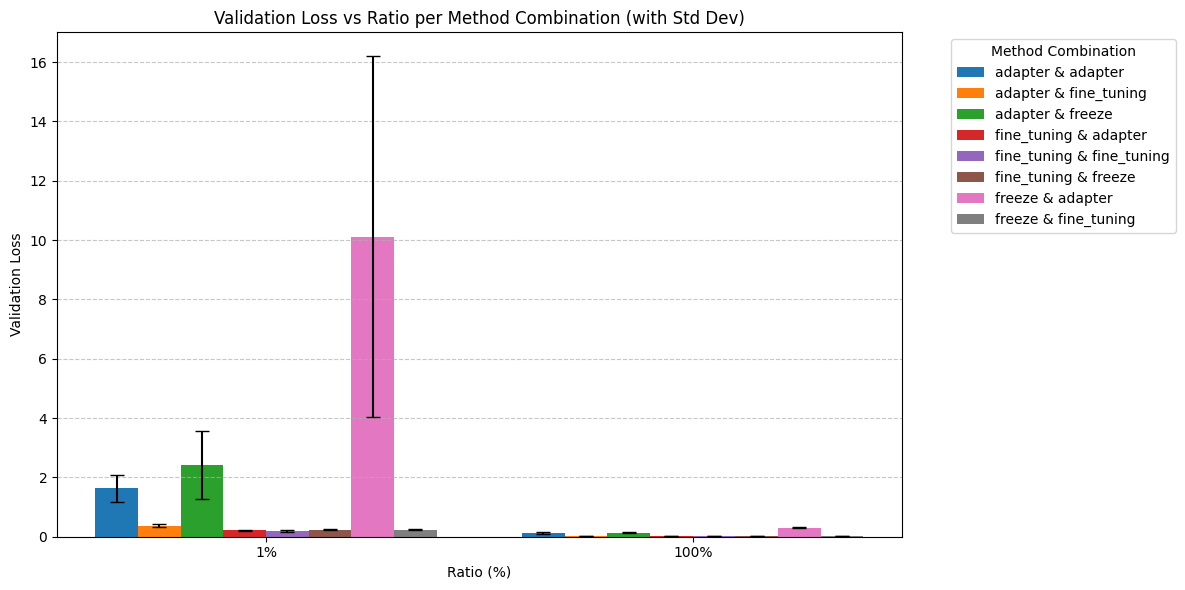

In [7]:
def plot_loss_with_std_matplotlib(data, loss_mean, loss_std, title, ylabel):
    plt.figure(figsize=(12, 6))

    # Preparando os dados
    ratios = sorted(data['ratio'].unique())  # Garantindo ordem dos ratios
    method_combinations = data['method_combination'].unique()

    bar_width = 0.15  # Largura das barras
    spacing = 0.3  # Espaçamento extra entre grupos
    x = np.arange(len(ratios)) * (len(method_combinations) * bar_width + spacing)  # Ajuste no espaçamento

    # Iterando sobre as combinações de métodos
    for i, method in enumerate(method_combinations):
        subset = data[data['method_combination'] == method]
        y_means = subset[loss_mean]
        y_stds = subset[loss_std]
        
        # Plotando as barras com erro
        plt.bar(x + i * bar_width, y_means, yerr=y_stds, capsize=5, width=bar_width, label=method)

    # Configurando os eixos e rótulos
    plt.xticks(x + (len(method_combinations) - 1) * bar_width / 2, [f"{int(r)}%" for r in ratios])
    plt.title(title)
    plt.xlabel('Ratio (%)')
    plt.ylabel(ylabel)
    plt.legend(title='Method Combination', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_loss_mean', 'test_loss_std',
                              'Test Loss vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_loss_mean', 'train_loss_std',
                              'Train Loss vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_loss_mean', 'val_loss_std',
                              'Validation Loss vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')

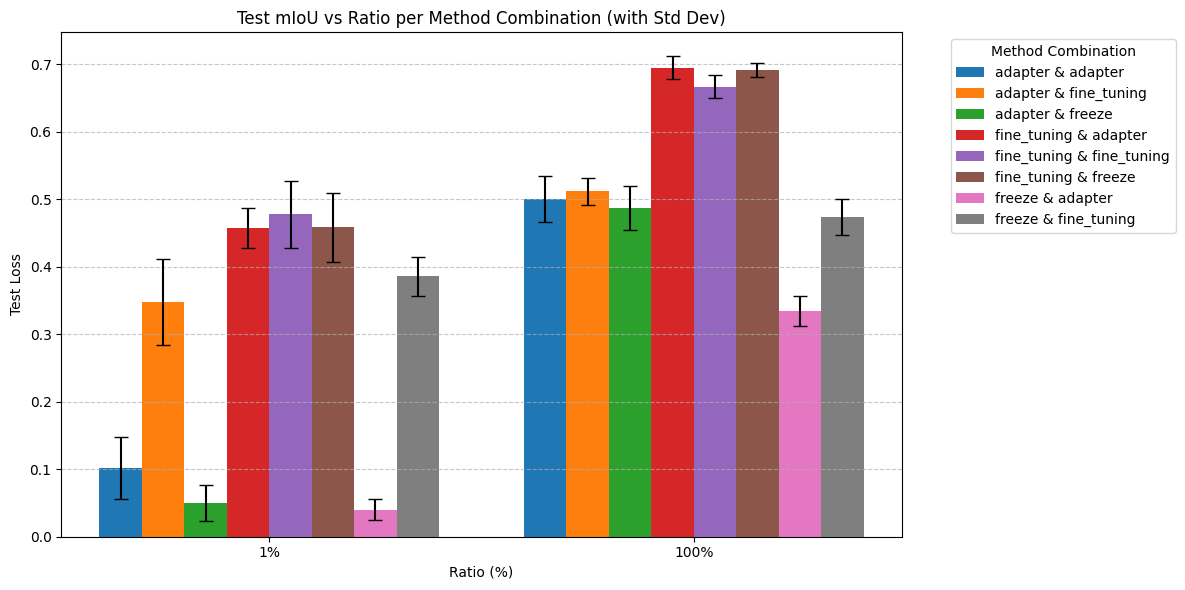

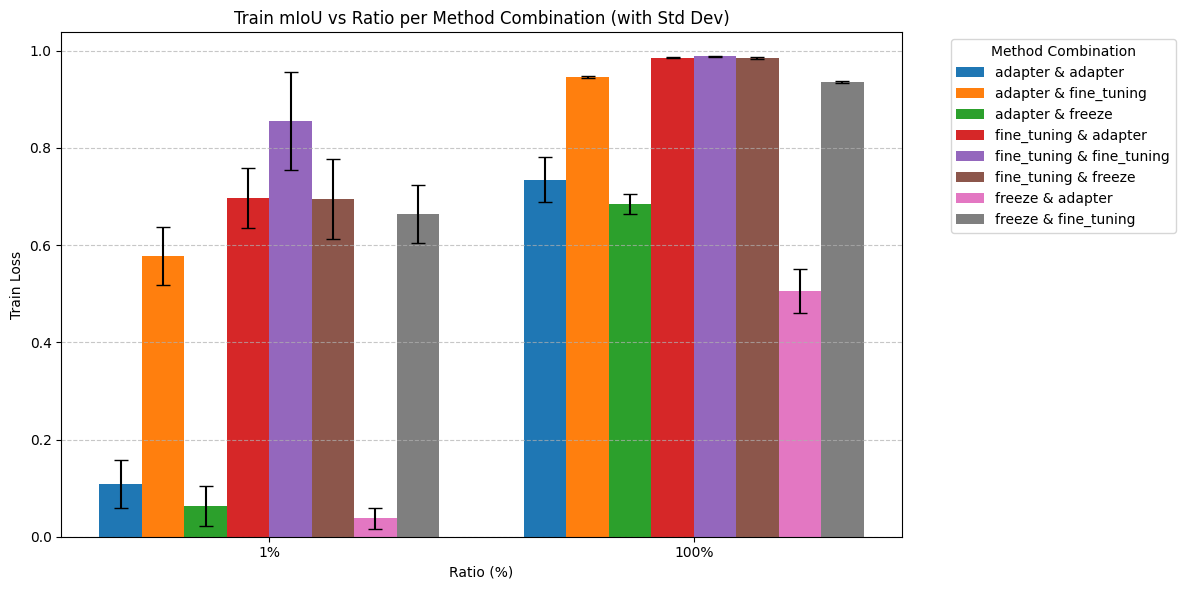

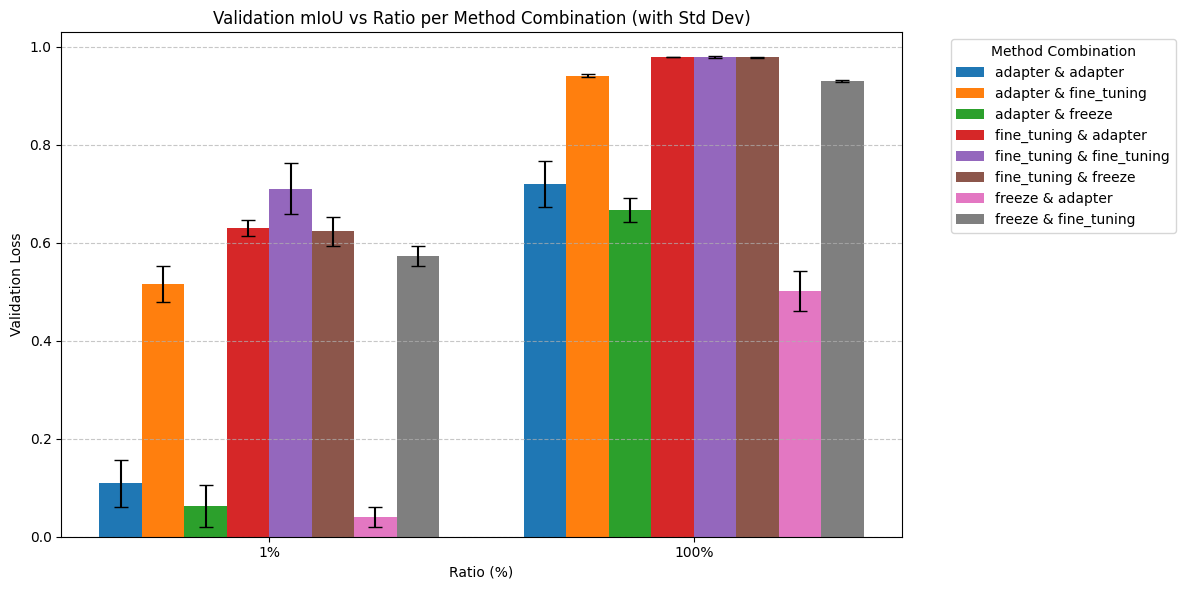

In [8]:
# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_mIoU_mean', 'test_mIoU_std',
                              'Test mIoU vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_mIoU_mean', 'train_mIoU_std',
                              'Train mIoU vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_mIoU_mean', 'val_mIoU_std',
                              'Validation mIoU vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')